In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("athlete_events.csv")

In [5]:
df.head(10)

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer       London           Judo   
2  DEN  1920 Summer  1920  Summer    Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
7  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
8  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   
9  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   

                                Event Medal  
0         Basketball Men's Basketball   NaN  
1        Judo Men's Extra-Lightweight   NaN  
2             Football Men's Football   NaN  
3         Tug-Of-War Men's Tug-Of-War  Gold  
4    Speed Skating Women's 500 metres   NaN  
5  Speed Skating Women's 1,000 metres   NaN  
6    Speed Skating Women's 500 metres   NaN  
7  Speed Skating Women's 1,000 metres   NaN  
8    Speed Skating Women's 500 metres   NaN  
9  Speed Skating Women's 1,000 metres   NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.describe().T

count          mean           std     min      25%      50%  \
ID      271116.0  68248.954396  39022.286345     1.0  34643.0  68205.0   
Age     261642.0     25.556898      6.393561    10.0     21.0     24.0   
Height  210945.0    175.338970     10.518462   127.0    168.0    175.0   
Weight  208241.0     70.702393     14.348020    25.0     60.0     70.0   
Year    271116.0   1978.378480     29.877632  1896.0   1960.0   1988.0   

              75%       max  
ID      102097.25  135571.0  
Age         28.00      97.0  
Height     183.00     226.0  
Weight      79.00     214.0  
Year      2002.00    2016.0

# 1. Has the number of athletes, nations, and events changed over time?

In [34]:
# df.groupby("Year")[["Team", "Event"]].value_counts()
df_1["athelets"]=df.groupby("Year")["ID"].nunique()
df_1["nations"]=df.groupby("Year")["Team"].nunique()
df_1["events"]=df.groupby("Year")["Event"].nunique()

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_1)

<AxesSubplot:xlabel='Year'>

# 2. Which countries won the most medals?

<AxesSubplot:xlabel='Team', ylabel='count'>

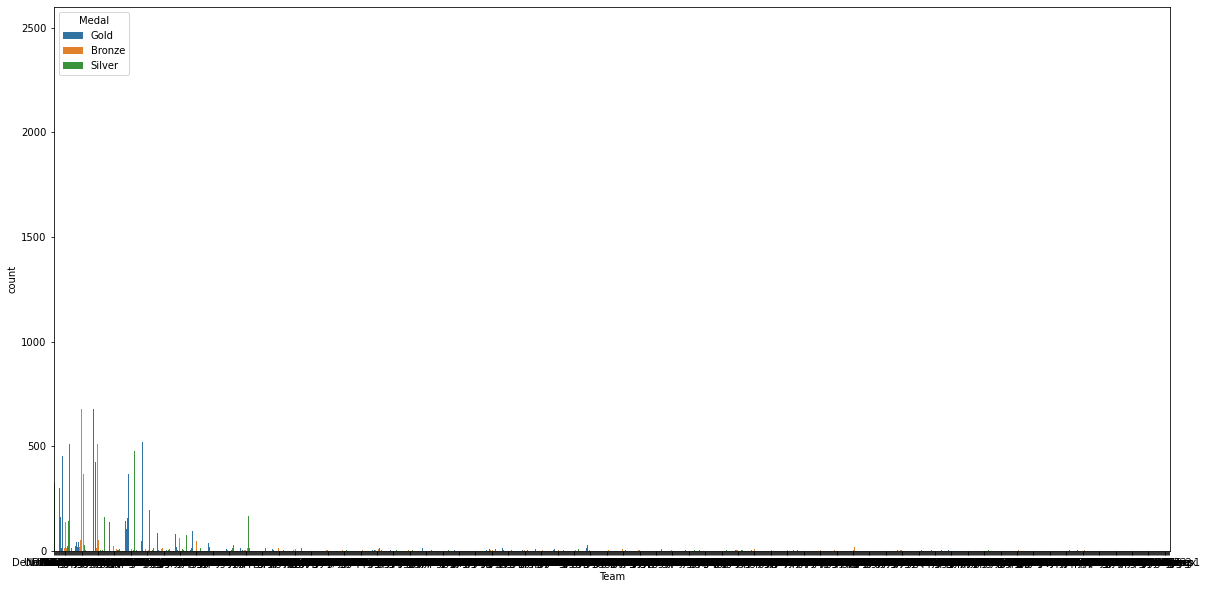

In [80]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="Team", hue="Medal")

In [91]:
df_gold=df[df["Medal"]=="Gold"].groupby("Team")["Medal"].value_counts(ascending=True, sort=True)

# 3. Number of men and women over time

<AxesSubplot:xlabel='Year', ylabel='count'>

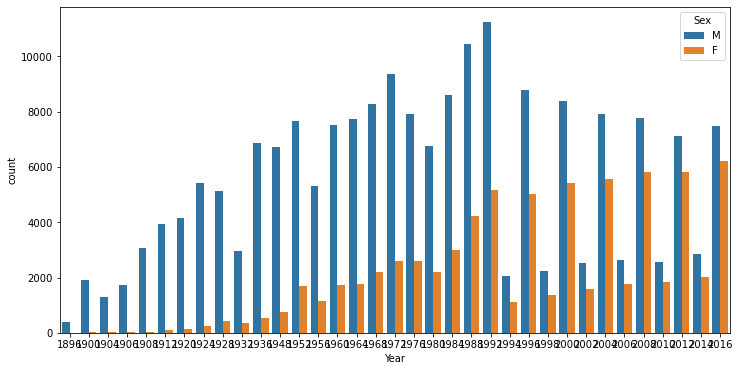

In [92]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Year", hue="Sex")

# 4. Number of women relative to men across countries

In [110]:
plt.figure(figsize=(6, 20))
sns.countplot(data=df[:1000], y="Team", hue="Sex")

<AxesSubplot:xlabel='count', ylabel='Team'>

# 5. Athlete height over time

<AxesSubplot:xlabel='Year', ylabel='mean'>

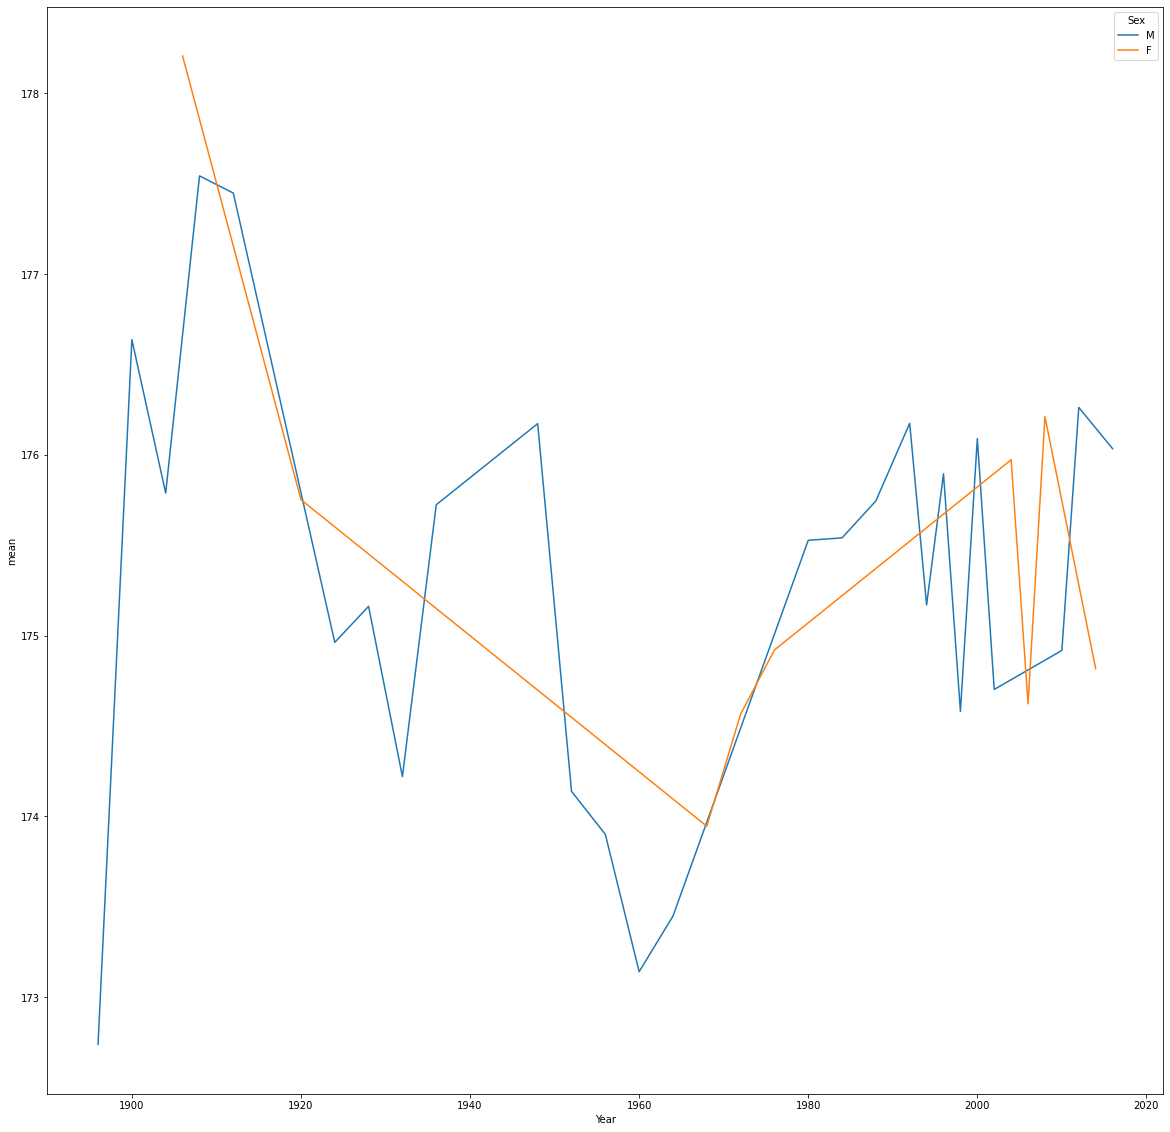

In [128]:
plt.figure(figsize=(20, 20))
df_hieght=pd.DataFrame({})
df_hieght["mean"]=df.groupby("Year")["Height"].mean()
sns.lineplot(x="Year", y="mean", data=df_hieght,  hue=df["Sex"])

# 6. Athlete weight over time

<AxesSubplot:xlabel='Year', ylabel='mean'>

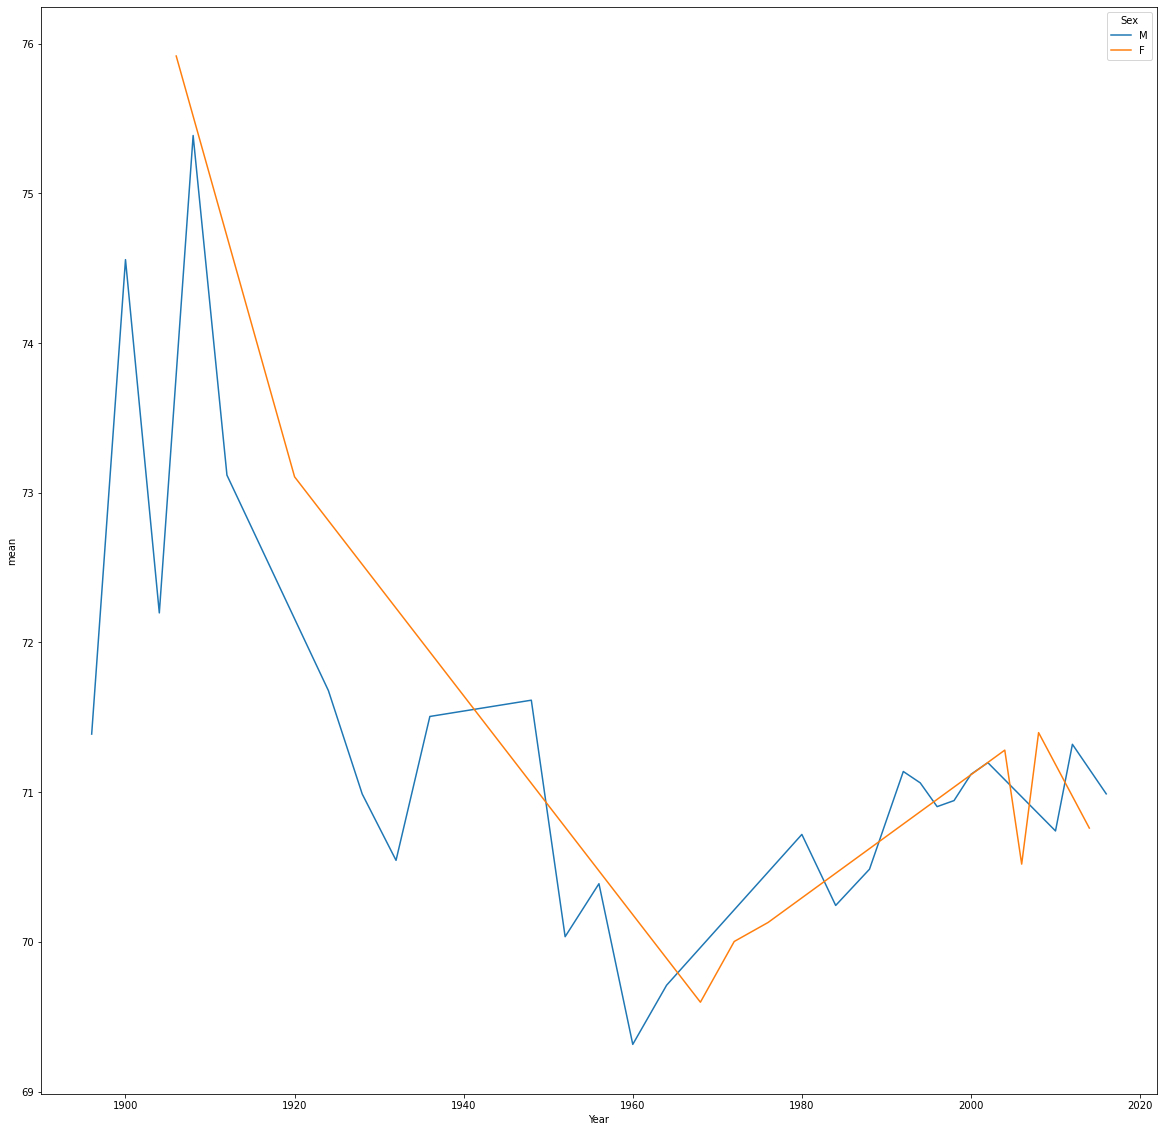

In [127]:
plt.figure(figsize=(20, 20))
df_wieght=pd.DataFrame({})
df_wieght["mean"]=df.groupby("Year")["Weight"].mean()
sns.lineplot(x="Year", y="mean", data=df_wieght, hue=df["Sex"])

# 7. Change in height vs change in weight over time across men’s sports

<AxesSubplot:xlabel='mean', ylabel='mean'>

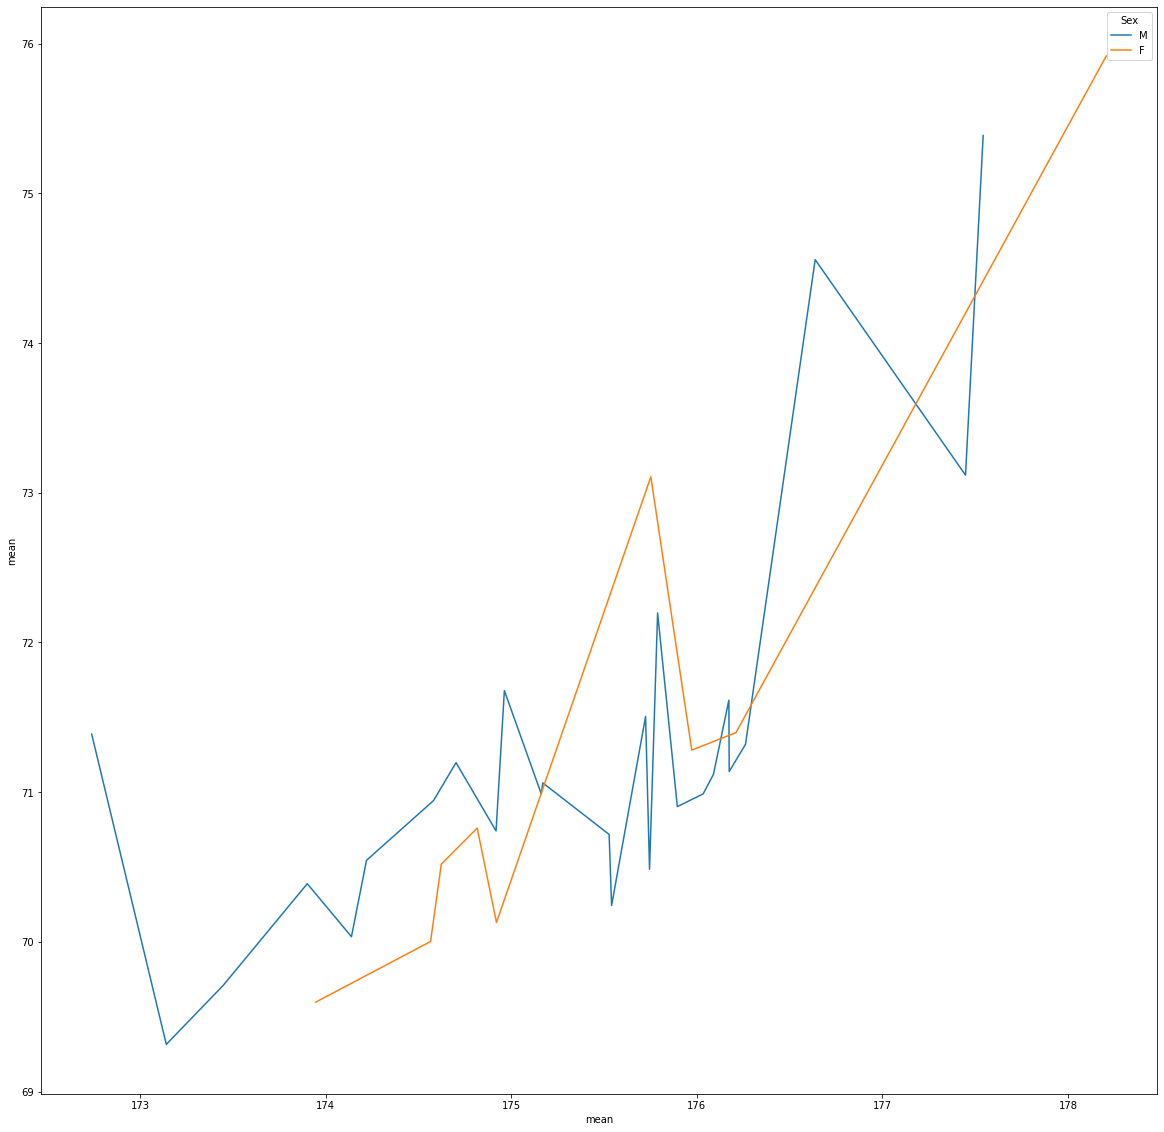

In [130]:
plt.figure(figsize=(20, 20))
sns.lineplot(x=df_hieght["mean"], y=df_wieght["mean"], hue=df["Sex"])